In [22]:
pip install xgboost

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("/content/supermarket_sales -.csv")

In [25]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [26]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [27]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [28]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [29]:
df.drop('Invoice ID',axis=1,inplace=True)

In [30]:
df.drop('gross margin percentage',axis=1,inplace=True)

In [31]:
df.drop(['Date','Time'],axis=1,inplace=True)

In [32]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
for i in ['Branch','City','Customer type','Gender','Product line','Payment']:
  df[i] = le.fit_transform(df[i])

In [35]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,26.1415,9.1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,3.8200,9.6
2,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,16.2155,7.4
3,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,23.2880,8.4
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,30.2085,5.3


In [38]:
x = df.drop(['Branch','City','Customer type','Gender','Product line','Payment','Quantity'],axis=1)

In [39]:
y  = df[['Branch','City','Customer type','Gender','Product line','Payment','Quantity']]

In [40]:
x.head()

,Unit price,Tax 5%,Total,cogs,gross income,Rating
0,74.69,26.1415,548.9715,522.83,26.1415,9.1
1,15.28,3.8200,80.2200,76.40,3.8200,9.6
2,46.33,16.2155,340.5255,324.31,16.2155,7.4
3,58.22,23.2880,489.0480,465.76,23.2880,8.4
4,86.31,30.2085,634.3785,604.17,30.2085,5.3


In [41]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [42]:
newx = minmax.fit_transform(x)

In [46]:
x = pd.DataFrame(newx,columns=('Unit price','Tax 5%','Total','cogs','gross income','Rating'))

In [48]:
df = pd.concat([x,y],axis=1)

In [49]:
df

,Unit price,Tax 5%,Total,cogs,gross income,Rating,Branch,City,Customer type,Gender,Product line,Payment,Quantity
0,0.718847,0.521616,0.521616,0.521616,0.521616,0.850000,0,2,0,0,3,2,7
1,0.057855,0.067387,0.067387,0.067387,0.067387,0.933333,2,1,1,0,0,0,5
2,0.403316,0.319628,0.319628,0.319628,0.319628,0.566667,0,2,1,1,4,1,7
3,0.535603,0.463549,0.463549,0.463549,0.463549,0.733333,0,2,0,1,3,2,8
4,0.848131,0.604377,0.604377,0.604377,0.604377,0.216667,0,2,1,1,5,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.336782,0.030707,0.030707,0.030707,0.030707,0.366667,2,1,1,1,3,2,1
996,0.971295,0.980465,0.980465,0.980465,0.980465,0.066667,1,0,1,0,4,2,10
997,0.242101,0.022049,0.022049,0.022049,0.022049,0.616667,0,2,0,1,2,0,1
998,0.620160,0.056622,0.056622,0.056622,0.056622,0.016667,0,2,1,1,4,0,1


In [50]:
df.corr()

,Unit price,Tax 5%,Total,cogs,gross income,Rating,Branch,City,Customer type,Gender,Product line,Payment,Quantity
Unit price,1.000000,0.633962,0.633962,0.633962,0.633962,-0.008778,0.028202,-0.013763,-0.020238,0.015445,0.019321,-0.015941,0.010778
Tax 5%,0.633962,1.000000,1.000000,1.000000,1.000000,-0.036442,0.041047,-0.012812,-0.019670,-0.049451,0.031621,-0.012434,0.705510
Total,0.633962,1.000000,1.000000,1.000000,1.000000,-0.036442,0.041047,-0.012812,-0.019670,-0.049451,0.031621,-0.012434,0.705510
cogs,0.633962,1.000000,1.000000,1.000000,1.000000,-0.036442,0.041047,-0.012812,-0.019670,-0.049451,0.031621,-0.012434,0.705510
gross income,0.633962,1.000000,1.000000,1.000000,1.000000,-0.036442,0.041047,-0.012812,-0.019670,-0.049451,0.031621,-0.012434,0.705510
Rating,-0.008778,-0.036442,-0.036442,-0.036442,-0.036442,1.000000,0.010238,0.049585,0.018889,0.004800,-0.020529,-0.005381,-0.015815
Branch,0.028202,0.041047,0.041047,0.041047,0.041047,0.010238,1.000000,-0.507401,-0.019608,-0.056318,-0.053938,-0.050104,0.015964
City,-0.013763,-0.012812,-0.012812,-0.012812,-0.012812,0.049585,-0.507401,1.000000,0.004899,0.012219,0.008811,0.019094,-0.002121
Customer type,-0.020238,-0.019670,-0.019670,-0.019670,-0.019670,0.018889,-0.019608,0.004899,1.000000,0.039996,-0.036800,0.018073,-0.016763
Gender,0.015445,-0.049451,-0.049451,-0.049451,-0.049451,0.004800,-0.056318,0.012219,0.039996,1.000000,0.005193,0.044578,-0.074258


<Axes: >

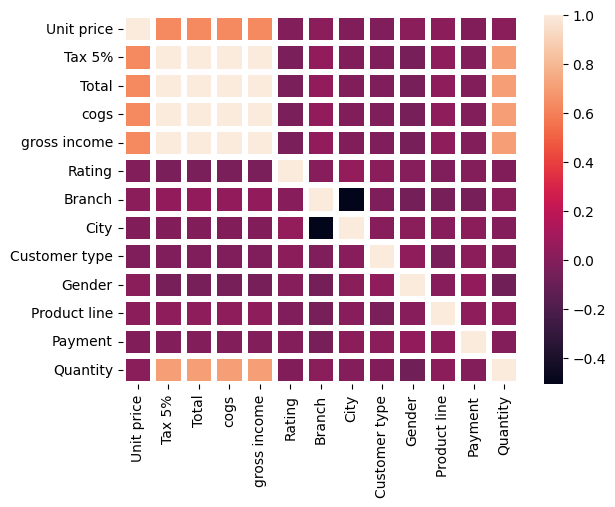

In [52]:
sns.heatmap(df.corr(),linewidth=3)

In [53]:
# BOOSTING MODEL WITH REGRESSION
# ADA BOOST
# GRADIENT
# XGBOOST

In [54]:
df.head()

,Unit price,Tax 5%,Total,cogs,gross income,Rating,Branch,City,Customer type,Gender,Product line,Payment,Quantity
0,0.718847,0.521616,0.521616,0.521616,0.521616,0.850000,0,2,0,0,3,2,7
1,0.057855,0.067387,0.067387,0.067387,0.067387,0.933333,2,1,1,0,0,0,5
2,0.403316,0.319628,0.319628,0.319628,0.319628,0.566667,0,2,1,1,4,1,7
3,0.535603,0.463549,0.463549,0.463549,0.463549,0.733333,0,2,0,1,3,2,8
4,0.848131,0.604377,0.604377,0.604377,0.604377,0.216667,0,2,1,1,5,2,7


In [55]:
df.nunique()

Unit price       943
Tax 5%           990
Total            990
cogs             990
gross income     990
Rating            61
Branch             3
City               3
Customer type      2
Gender             2
Product line       6
Payment            3
Quantity          10
dtype: int64

In [56]:
x = df.drop('gross income',axis=1)
x1 = pd.DataFrame(x)
y = df['gross income']
y1 = pd.DataFrame(y)

In [57]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25,random_state=42)

In [64]:
from sklearn.metrics import mean_squared_error,r2_score

In [58]:
# Ada boost

from sklearn.ensemble import AdaBoostRegressor
model1 = AdaBoostRegressor()
model1.fit(x1_train,y1_train)
y1_predADB = model1.predict(x1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
print("the mse is:", mean_squared_error(y1_test,y1_predADB))

the mse is: 0.00016126463782886142


In [69]:
print("the r2_score is:", r2_score(y1_test,y1_predADB))

the r2_score is: 0.9974654662008128


In [70]:
# gradient

from sklearn.ensemble import GradientBoostingRegressor
model2 = GradientBoostingRegressor()
model2.fit(x1_train,y1_train)
y1_predGBR = model2.predict(x1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
print("the mse is:", mean_squared_error(y1_test,y1_predGBR))

the mse is: 4.008467657204207e-06


In [72]:
print("the r2_score is:", r2_score(y1_test,y1_predGBR))

the r2_score is: 0.9999370004676976


In [75]:
pip install xgboost

In [77]:
# XGBOOST

from xgboost import XGBRegressor
model3 = XGBRegressor()
model3.fit(x1_train,y1_train)
y1_predXGR = model3.predict(x1_test)

In [78]:
print("the mse is:", mean_squared_error(y1_test,y1_predXGR))

the mse is: 1.4207216843807189e-05


In [79]:
print("the r2_score is:", r2_score(y1_test,y1_predXGR))

the r2_score is: 0.9997767106802347


In [80]:
df.head()

,Unit price,Tax 5%,Total,cogs,gross income,Rating,Branch,City,Customer type,Gender,Product line,Payment,Quantity
0,0.718847,0.521616,0.521616,0.521616,0.521616,0.850000,0,2,0,0,3,2,7
1,0.057855,0.067387,0.067387,0.067387,0.067387,0.933333,2,1,1,0,0,0,5
2,0.403316,0.319628,0.319628,0.319628,0.319628,0.566667,0,2,1,1,4,1,7
3,0.535603,0.463549,0.463549,0.463549,0.463549,0.733333,0,2,0,1,3,2,8
4,0.848131,0.604377,0.604377,0.604377,0.604377,0.216667,0,2,1,1,5,2,7


In [81]:
model1.predict([[0.718847,	0.521616,	0.521616,	0.521616,	0.850000,	0,	2,	0,	0,	3,	2,	7]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


array([0.53350967])

In [82]:
model2.predict([[0.718847,	0.521616,	0.521616,	0.521616,	0.850000,	0,	2,	0,	0,	3,	2,	7]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([0.52148503])

In [83]:
model3.predict([[0.718847,	0.521616,	0.521616,	0.521616,	0.850000,	0,	2,	0,	0,	3,	2,	7]])

array([0.52226293], dtype=float32)